In [21]:
# This plotting tutorial using PyPlot and DataFrames packages
using PyPlot
using DataFrames

In [22]:
# Prepare the data to plot
file = open("result.csv", "w")
write(file, "x, y\n")

for i = range(-2, stop = 2, length = 301) 
    x = i
    y = 2*x^2
    write(file, "$x, $y\n")
end 
close(file)

In [23]:
data = readtable("result.csv")

,x,y
,Float64⍰,Float64⍰
1,-2.0,8.0
2,-1.98667,7.89369
3,-1.97333,7.78809
4,-1.96,7.6832
5,-1.94667,7.57902
6,-1.93333,7.47556
7,-1.92,7.3728
8,-1.90667,7.27076
9,-1.89333,7.16942


In [24]:
#####################
# PLOT WITH ALL DATA
#####################

In [25]:
function plot1()
    plot(data[:x], data[:y], linestyle = "-", linewidth = "1", marker = "o", markersize = "5")
end 
plot1()

MethodError: MethodError: no method matching plot1(::DataFrame)
Closest candidates are:
  plot1() at In[25]:2

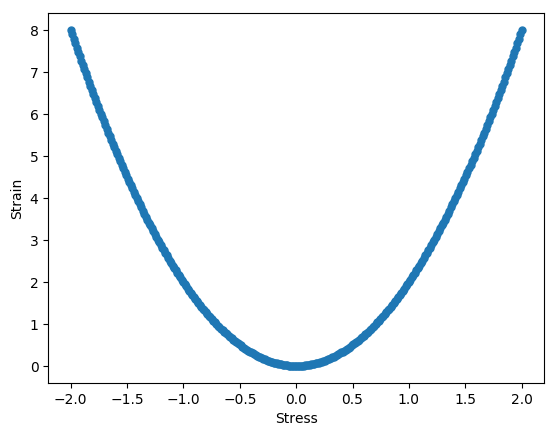

PyObject Text(24,0.5,'Strain')

In [26]:
# Label the axis
function plot2()
    plot1()
    xlabel("Stress")
    ylabel("Strain")
end 
plot2()

In [27]:
# Italic the 
function plot3()
    plot1()
    xlabel("Axial strain \$ɛ_a\$")
    ylabel("Axial stress \$σ_a\$")
end
plot3(data)

MethodError: MethodError: no method matching plot3(::DataFrame)
Closest candidates are:
  plot3() at In[27]:3

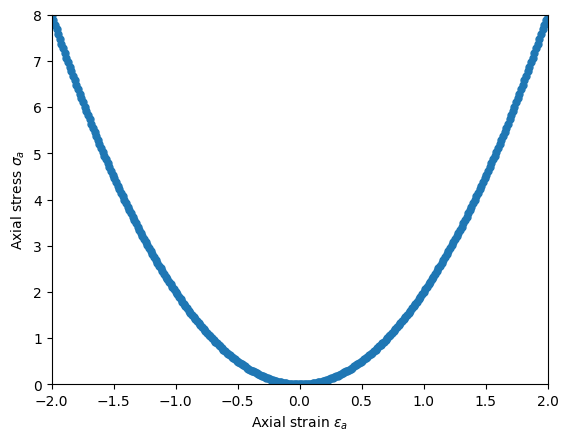

(-2, 2)

In [28]:
# LIMIT FOR x AND Y AXIS
function plot4()
    plot3()
    ylim(0,8)
    xlim(-2,2) 
end
plot4()

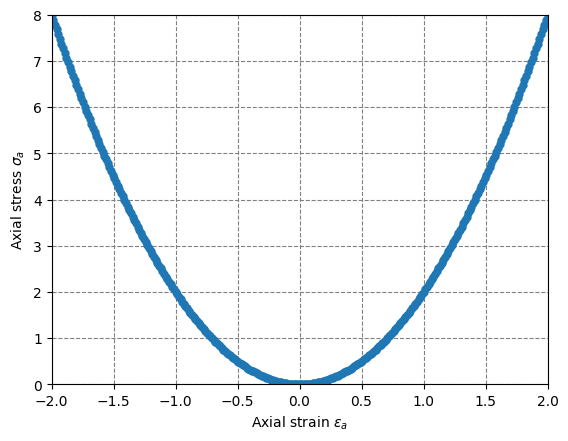

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [29]:
# GRID
function plot5()
    plot4()
    grid(linestyle = "--", linewidth = 0.8, color = "grey")
    grid("on")
end
plot5()

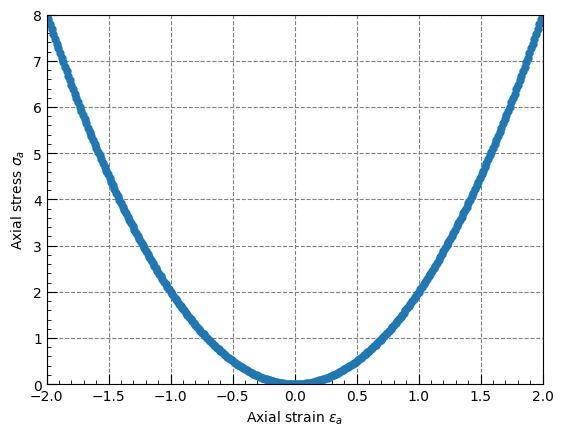

In [30]:
# MAJOR AND MINOR TICKS
function plot6()
   plot5()
   tick_params(which = "both", direction = "in", color = "black")
   tick_params(which="major", length=7 )
   tick_params(which="minor", length=3)
   minorticks_on() 
    
    ax = gca()
    Mx = matplotlib[:ticker][:MultipleLocator](0.5) # Define interval of major ticks
    ax[:xaxis][:set_major_locator](Mx) # Set interval of major ticks

    My = matplotlib[:ticker][:MultipleLocator](1.0) # Define interval of major ticks
    ax[:yaxis][:set_major_locator](My) # Set interval of major ticks

    my = matplotlib[:ticker][:MultipleLocator](0.2) # Define interval of minor ticks
    ax[:yaxis][:set_minor_locator](my) # Set interval of minor ticks
    
    mx = matplotlib[:ticker][:MultipleLocator](0.1) # Define interval of minor ticks
    ax[:xaxis][:set_minor_locator](mx) # Set interval of minor ticks
end
plot6()

In [31]:
#####################
# PLOT WITH A FEW DATA
#####################

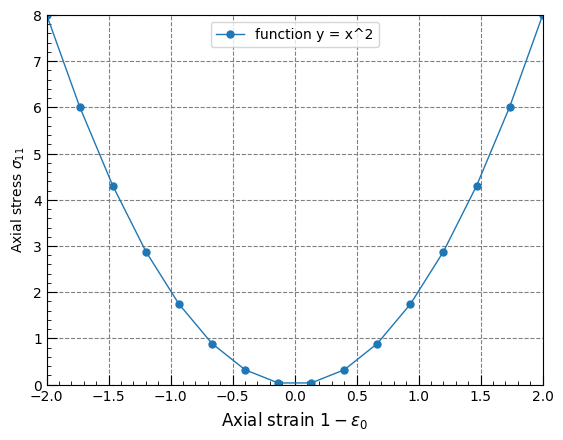

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [32]:
function plot7()
    x = []
    y = []
    for i = 1:20:length(data[:x])
        push!(x, data[:x][i])
        push!(y, data[:y][i])
    end 

    
    plot(x, y, linestyle = "-", linewidth = "1", marker = "o", markersize = "5",label = "function y = x^2" )

    # show legend with the appropriate location 
    legend(loc = 9)
    
    #label for x and y axes
    xlabel("Axial strain \$1-ɛ_{0}\$", fontsize = 12, fontname ="Times New Roman")
    ylabel("Axial stress \$σ_{11}\$")

    #limit for x and y axis
    ylim(0,8)
    xlim(-2,2)

    # grid line
    grid(linestyle = "--", linewidth = 0.8, color = "grey")
    grid("on")

    # minor sticks and major stick
    tick_params(which = "both", direction = "in", color = "black")
    tick_params(which="major", length=7)
    tick_params(which="minor", length=3)
    locator_params(numticks=2)
    minorticks_on()
end
plot7()

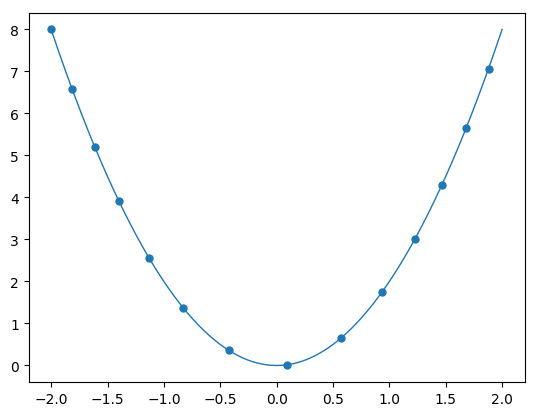

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7b9deb8dd0>

In [33]:
function plot7a()
     plot(data[:x], data[:y], linestyle = "-", markevery = 0.1, linewidth = "1", marker = "o", markersize = "5")
end

plot7a()

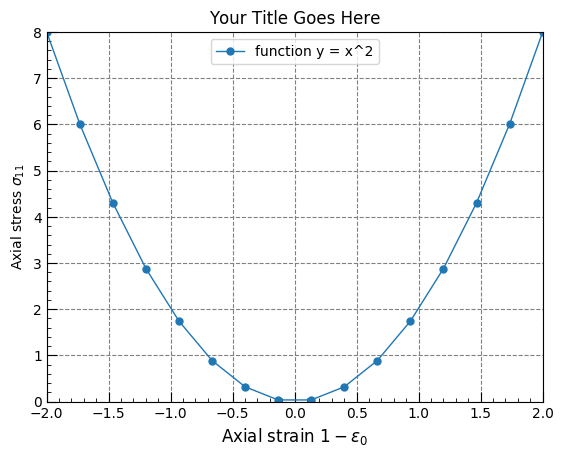

PyObject Text(0.5,1,'Your Title Goes Here')

In [34]:
# TITLE　
function plot8()
    plot7()
    title("Your Title Goes Here")
end
plot8()

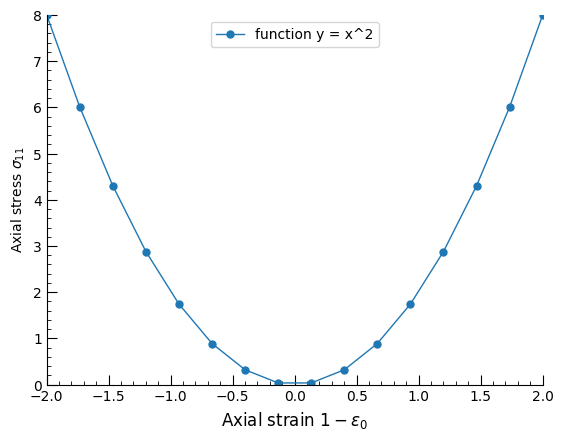

In [35]:
# Turn off the right hand side and the top of the border
function plot8()
    plot7()
    ax = gca()
    ax[:spines]["top"][:set_visible](false) # Hide the top edge of the axis
    ax[:spines]["right"][:set_visible](false) # Hide the bottom edge of the axis
    grid("off")
end
plot8()


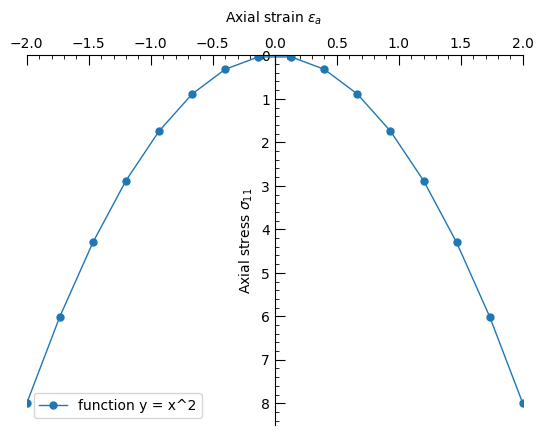

In [36]:
function plot9()
    plot7()
    legend(loc=3)
    grid("off")
    ylim(8.5, 0)
    ax = gca()
    xlabel("")
    text(-0.4, -0.75, "Axial strain \$ɛ_a\$")
    
    ax[:spines]["bottom"][:set_visible](false) # Hide the top edge of the axis
    ax[:spines]["right"][:set_visible](false) # Hide the right edge of the axis
    ax[:spines]["left"][:set_position]("center") # Move the right axis to the center
    #ax[:spines]["bottom"][:set_position]("center") # Most the bottom axis to the center
    ax[:xaxis][:set_ticks_position]("top") # Set the x-ticks to only the bottom
    #ax[:yaxis][:set_ticks_position]("left") # Set the y-ticks to only the left
end
plot9()

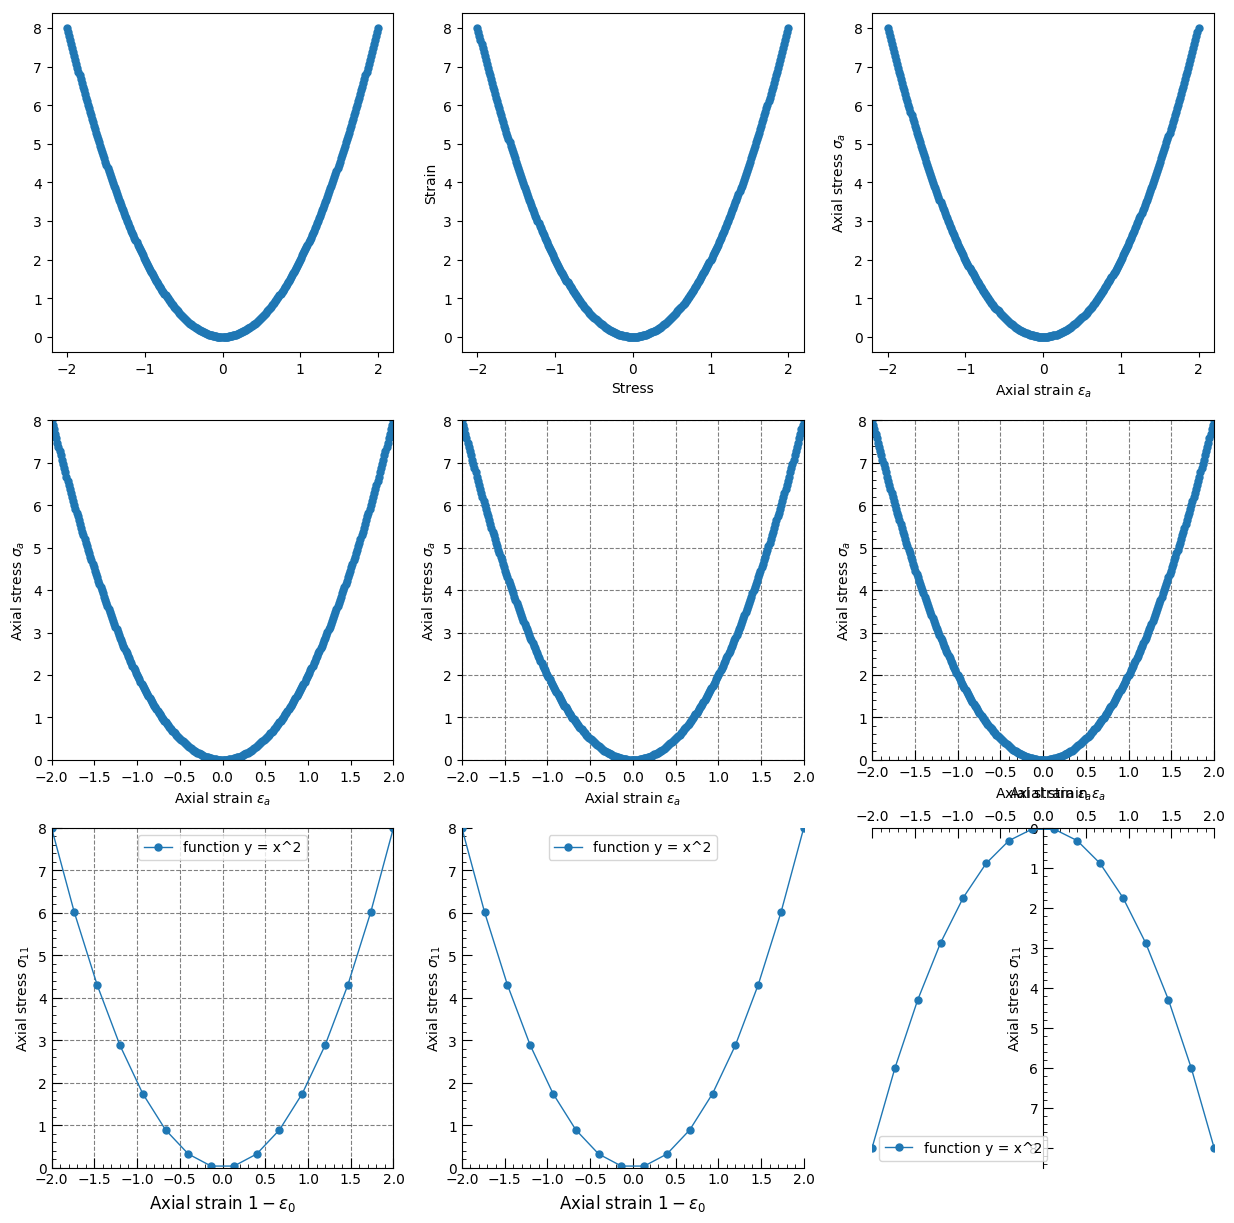

In [37]:
function plot10()
    # FIGURE SIZE
    figure(figsize=(15,15))
    
    subplot(3,3,1)
    plot1()
    
    subplot(3,3,2)
    plot2()
    
    subplot(3,3,3)
    plot3()
    
    subplot(3,3,4)
    plot4()  
    
    subplot(3,3,5)
    plot5()
    
    subplot(3,3,6)
    plot6()
    
    subplot(3,3,7)
    plot7()
    
    subplot(3,3,8)
    plot8()
   
    subplot(3,3,9)
    plot9()
end

 plot10()   

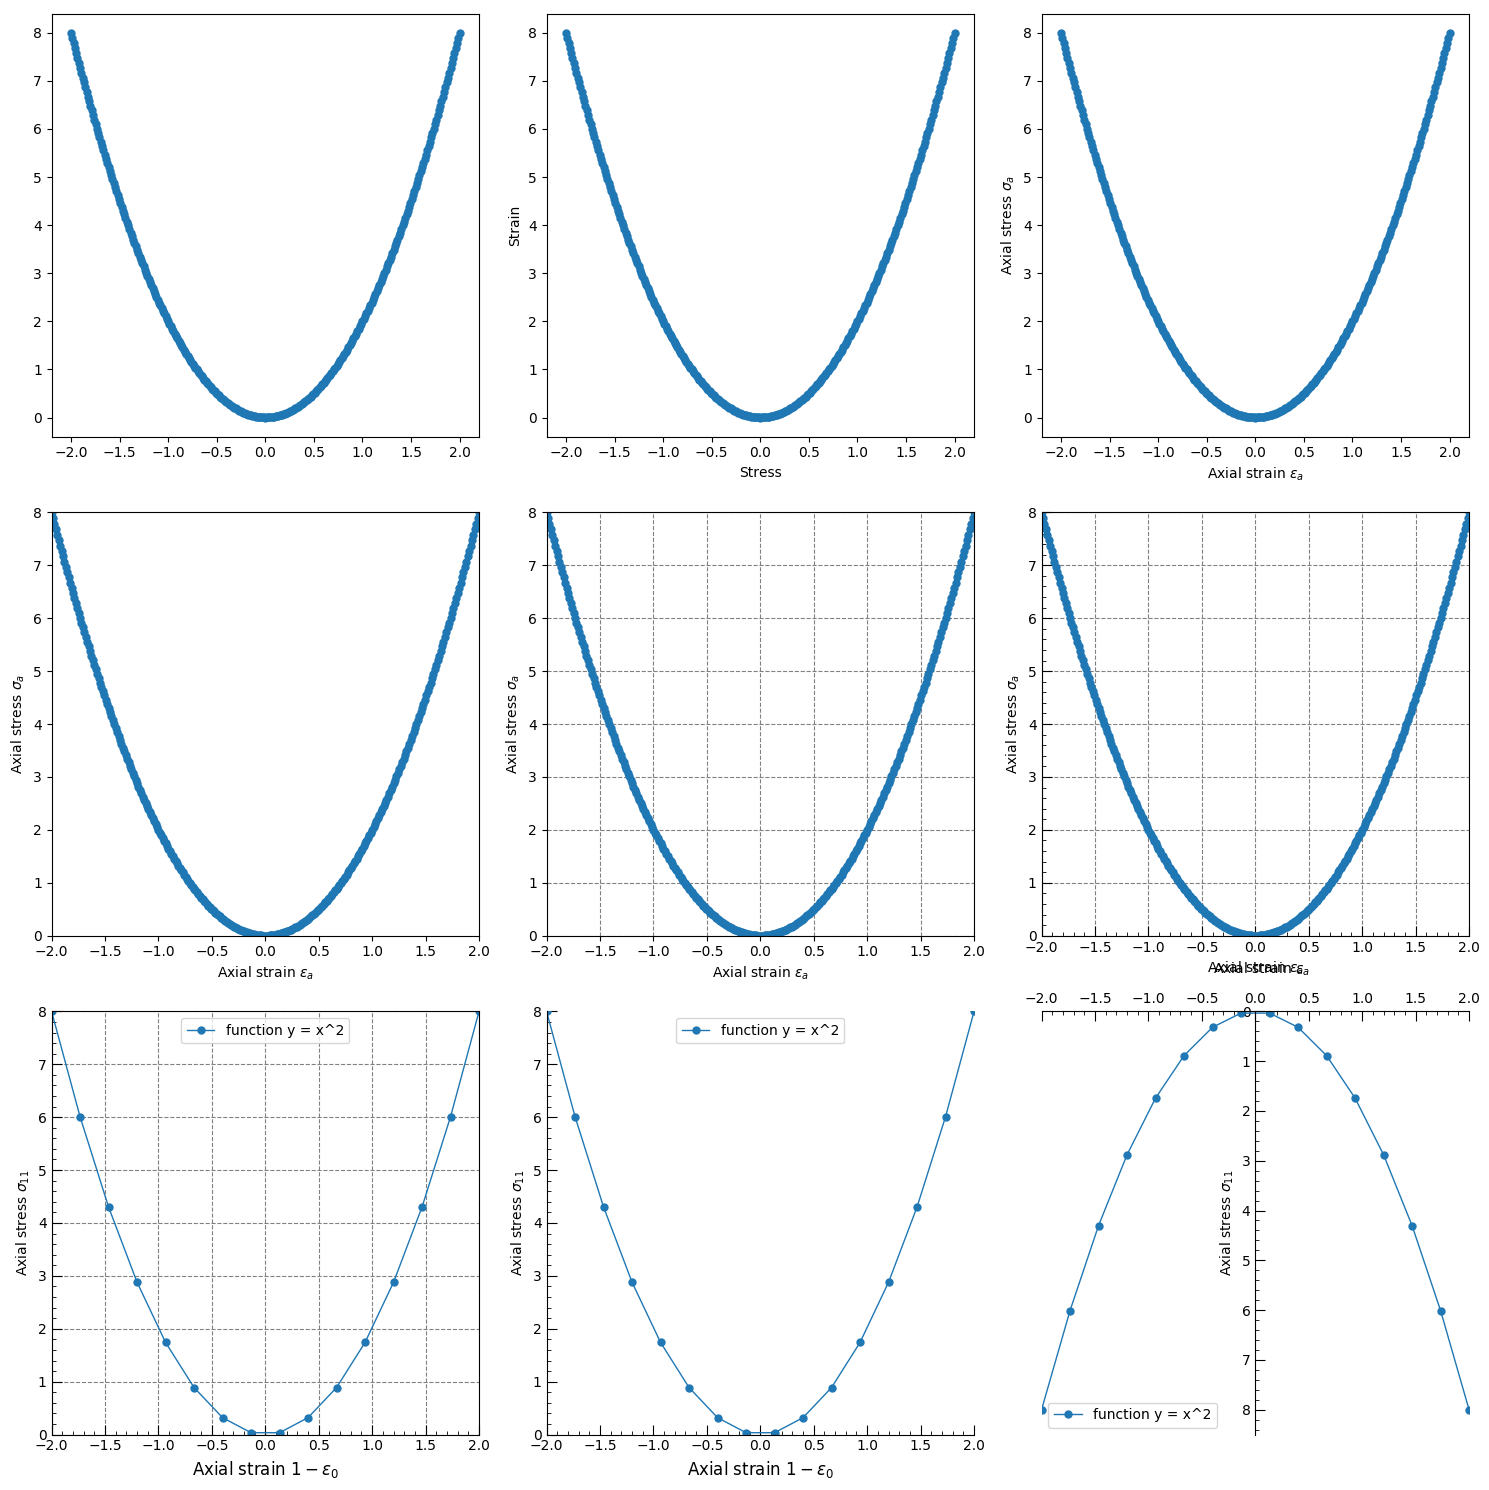

In [38]:
# ADJUST DISTANCE BETWEEN FIGURES
plot10()   
tight_layout()

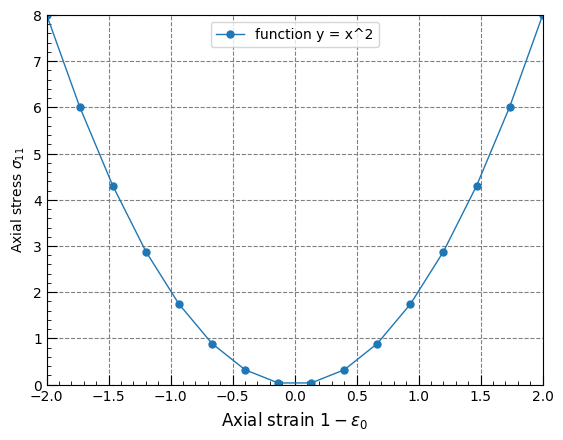

In [39]:
# SAVE FIGURE WITH HIGH QUALITY
plot7()

ax=gca()
savefig("High_quality_figure", dpi = 2000)

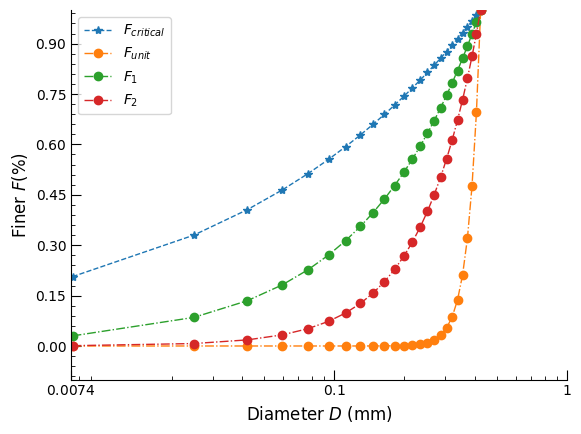

(PyCall.PyObject[PyObject <matplotlib.axis.XTick object at 0x7f7b7df82310>, PyObject <matplotlib.axis.XTick object at 0x7f7b7df82a50>, PyObject <matplotlib.axis.XTick object at 0x7f7b7df82c10>], PyCall.PyObject[PyObject Text(0.0074,0,'$0.0074$'), PyObject Text(0.1,0,'$0.1$'), PyObject Text(1,0,'$1$')])

In [40]:
# LOG SCALE IN X AXIS AND THE POSITION OF TICKS


using DataFrames
using PyPlot


D_max = 0.425
D_min_limit = 0.0075
k_unit = 20
k_crit  = 0.9
k_1 = 2
k_2 = 4

D=[]
f_crit=[]
f_unit=[]
f_1=[]
f_2=[]

D1 = range(D_min_limit, stop = D_max, length = 25)
D1 = collect(D1)

for d in D1
    push!(D, d)
    push!(f_crit,  exp(k_crit * log10(d/D_max)))
    push!(f_unit,  exp(k_unit * log10(d/D_max)))
    push!(f_1,  exp(k_1 * log10(d/D_max)))
    push!(f_2,  exp(k_2 * log10(d/D_max)))
end

figure()
plot(D,f_crit, label=L"F_{critical}", linestyle = "--", "*", lw = 1)
plot(D,f_unit, label=L"F_{unit}", linestyle = "-.", "o", lw = 1.0)
plot(D,f_1, label=L"F_1", linestyle = "-.", "o", lw = 1.0)
plot(D,f_2, label=L"F_2", linestyle = "-.", "o", lw = 1.0)


ylabel("Finer \$F\$(%)", fontsize = 12)
xlabel("Diameter \$D \$ (mm)", fontsize = 12)
#title("Particle Size Distribution - IG value", fontsize = 20, fontname = "Times New Roman")
legend(fontsize = 10, loc = 2)
#grid("on")
xscale("log")
# minor sticks and major stick
tick_params(which = "both", direction = "in", color = "black")
tick_params(which="major", length=7)
tick_params(which="minor", length=3)
#locator_params(numticks=2)
minorticks_on()


ax = gca()
My = matplotlib[:ticker][:MultipleLocator](0.15) # Define interval of major ticks
ax[:yaxis][:set_major_locator](My) # Set interval of major ticks

my = matplotlib[:ticker][:MultipleLocator](0.03) # Define interval of minor ticks
ax[:yaxis][:set_minor_locator](my) # Set interval of minor ticks


ax = gca()
ax[:spines]["top"][:set_visible](false) # Hide the top edge of the axis
ax[:spines]["right"][:set_visible](false) # Hide the bottom edge of the axis


ylim(-0.10,1)
xlim(0.0074,1)
xticks([ 0.0074,0.1,1],[L"$0.0074$", L"$0.1$", L"$1$"])

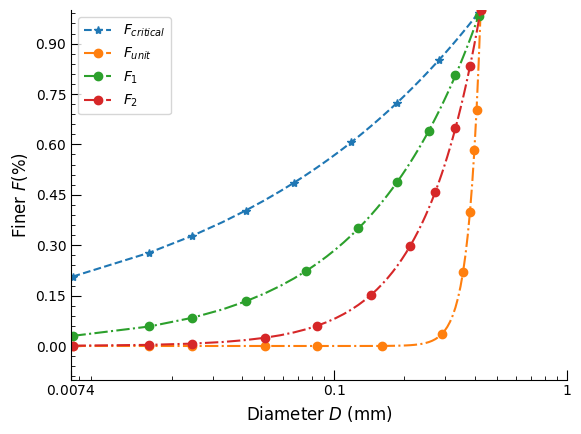

(PyCall.PyObject[PyObject <matplotlib.axis.XTick object at 0x7f7b9c260650>, PyObject <matplotlib.axis.XTick object at 0x7f7b9c2b1750>, PyObject <matplotlib.axis.XTick object at 0x7f7b9c2b1a50>], PyCall.PyObject[PyObject Text(0.0074,0,'$0.0074$'), PyObject Text(0.1,0,'$0.1$'), PyObject Text(1,0,'$1$')])

In [41]:
# USING "markevery"

using DataFrames
using PyPlot


D_max = 0.425
D_min_limit = 0.0075
k_unit = 20
k_crit  = 0.9
k_1 = 2
k_2 = 4

D=[]
f_crit=[]
f_unit=[]
f_1=[]
f_2=[]

D1 = range(D_min_limit, stop = D_max, length = 50)
D1 = collect(D1)

for d in D1
    push!(D, d)
    push!(f_crit,  exp(k_crit * log10(d/D_max)))
    push!(f_unit,  exp(k_unit * log10(d/D_max)))
    push!(f_1,  exp(k_1 * log10(d/D_max)))
    push!(f_2,  exp(k_2 * log10(d/D_max)))
end

figure()
plot(D,f_crit, label=L"F_{critical}", linestyle = "--", "*", markevery = 0.1)

plot(D,f_unit, label=L"F_{unit}", linestyle = "-.", "o", markevery = 0.1)
plot(D,f_1, label=L"F_1", linestyle = "-.", "o", markevery = 0.1)
plot(D,f_2, label=L"F_2", linestyle = "-.", "o", markevery = 0.1)


ylabel("Finer \$F\$(%)", fontsize = 12)
xlabel("Diameter \$D \$ (mm)", fontsize = 12)

legend(fontsize = 10, loc = 2)

xscale("log")
# minor sticks and major stick
tick_params(which = "both", direction = "in", color = "black")
tick_params(which="major", length=7)
tick_params(which="minor", length=3)

minorticks_on()


ax = gca()
My = matplotlib[:ticker][:MultipleLocator](0.15) # Define interval of major ticks
ax[:yaxis][:set_major_locator](My) # Set interval of major ticks

my = matplotlib[:ticker][:MultipleLocator](0.03) # Define interval of minor ticks
ax[:yaxis][:set_minor_locator](my) # Set interval of minor ticks


ax = gca()
ax[:spines]["top"][:set_visible](false) # Hide the top edge of the axis
ax[:spines]["right"][:set_visible](false) # Hide the bottom edge of the axis


ylim(-0.10,1)
xlim(0.0074,1)
xticks([ 0.0074,0.1,1],[L"$0.0074$", L"$0.1$", L"$1$"])
